In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.integrate import simpson
import time
from IPython.display import clear_output
plt.rcParams.update({'font.size': 14})


# Constants
k_B = 8.617333262145e-5    # Boltzmann constant in eV/K
hbar = 6.582119569e-16     # Reduced Planck constant in eV*s
m_e = 5.485e-4             # electron mass [eV*(s/m)^2]
E_F = 5.0                  # Chemical potential [eV]
T_F = E_F/k_B              # Fermi temperature [K]
T_e = 300                  # electron system temperature [K]             
c = 3e8                    # speed of light [m/s]
E_L = 2.25                 # pump photon energy [eV]
EF_L = 5e10                # pump field strength [V^2/m^2]
EF_sat = 1e13              # saturation field [V^2/m^2]

**electronic density of states** (eDOS) in 3D

$$ \rho_e(\mathcal{E}) = \frac{{m_e}^{3/2}}{\pi^2\hbar^3}\sqrt{2\mathcal{E}} $$


In [1]:
def plot_comparison(E_em_values, I_e_T_numeric_vals,  I_e_T_analytic_vals):

    relative_error_vals = np.abs((I_e_T_analytic_vals - I_e_T_numeric_vals)/(I_e_T_analytic_vals))

    fig = plt.figure(figsize = (6,8), dpi = 150)

    # Create a GridSpec with 5 rows and 1 column
    gs = gridspec.GridSpec(5, 1, height_ratios=[4, 4, 4, 4, 4])

    ax2 = plt.subplot(gs[2:5, 0])
    ax1 = plt.subplot(gs[1, 0], sharex=ax2)
    ax1.label_outer()

    # ax1.set_title(r"thermal electronic contribution to emission (with eDOS)", fontsize = 12)
    ax1.plot(E_em_values, np.log10(relative_error_vals), label=r"$log_{10}(\delta_{rel})$",color = 'k')
    ax1.legend(frameon=False, fontsize = 11)
    ax1.set_yticks([-15,-10,-5,0])

    ax2.plot(E_em_values, np.log10(I_e_T_numeric_vals), label=r"numeric", linewidth = 6)
    ax2.plot(E_em_values, np.log10(I_e_T_analytic_vals), linestyle = "--", label = r"analytic", linewidth = 2)

    # ax2.set_xlabel('$\\omega / \\omega_{ L}$', fontsize = 14)
    ax2.set_xlabel('$\\hbar\\omega$ [eV]', fontsize = 14)
    ax2.set_ylabel(r'$\log_{10}(I_e)$', fontsize = 16)

    ax2.set_xlim(min(E_em_values), max(E_em_values))

    x_ticks = np.array([0, E_L, E_F, 8])
    x_tick_labels = np.round( (1/E_L)*np.array([0, E_L, E_F, max(x_ticks)]) , 2)
    # ax2.set_xticks(x_ticks, x_tick_labels)

    ax2.legend(frameon=False, fontsize = 11)

In [40]:
def g(E):
    return ( ((m_e)**(3/2)) / ((np.pi**2)*(hbar**3)) )*np.sqrt(2*E);

**thermal (Fermi-Dirac) distribution** with approximated chemical potential.

$$
f^{T}(\mathcal{E}) = \frac{1}{\exp\Big(\frac{\mathcal{E}-\mu}{k_{B}T}\Big)+1}
$$

$$\mu(T) = \mathcal{E}_{\scriptsize F}\left[1- \frac{\pi^{2}}{12}\left( \frac{T}{T_{\scriptsize F}} \right)^{2}\right]$$

In [ ]:
def f_T(E):
    C = ((np.pi**2)/12)
    mu = E_F*( 1 - C*((T_e/T_F)**2))                        # chemical potential for fermi gas with T << T_F in 3D
    return 1 / (np.exp((E - mu) / (k_B * T_e)) + 1);

**analytic expression** denoted by $\mathcal{I}$ for thermal emission (black body)

$$\mathcal{I}_{e}^{T}(\omega)=\rho_e^{2}(\mathcal{E}_{\scriptsize F}) \ \frac{\hbar\omega}{\exp\left( \frac{\hbar\omega }{k_{\scriptsize B}T} \right)+1}$$

In [6]:
def E_BB(E_em):
    return E_em / (np.exp((E_em) / (k_B * T_e)) - 1);

def I_e_T_analytic(E_em):
    return E_BB(E_em) * g(E_F) * g(E_F);

$$\mathcal{I}$$

In [7]:
# integrand in the I_e_T integral
def j_T(E, E_em, eDOS = 'eDOS'):
    if eDOS == 'eDOS':
        return f_T(E + E_em) * (1 - f_T(E)) * g(E + E_em) * g(E)

E_min = 0.0       # lower integration limit [eV]
E_max = 20.0      # lower integration limit [eV]
dE = 0.0005       # lower integration limit [eV]

# thermal numeric integration
def I_e_T_numeric(E_em, eDOS = 'eDOS'):
    E = np.arange(E_min, E_max, dE)
    return simpson(j_T(E, E_em, eDOS), E)

# emission energy values
E_em_vals = np.linspace(0.01, 8.0, 1000)

# thermal emission spectra 
I_e_T_numeric_vals = np.array( [I_e_T_numeric(E_em, 'eDOS') for E_em in E_em_vals] );
I_e_T_numeric_vals_c = np.array( [I_e_T_numeric(E_em, 'const') for E_em in E_em_vals] );
I_e_T_analytic_vals = np.array( I_e_T_analytic(E_em_vals) );

np.savetxt("/Users/ben/Desktop/I_e_T_energy_integral", I_e_T_numeric_vals, delimiter=",", fmt='%d')

/var/folders/8_/lb82j87n40q1pn140s68mgz80000gn/T/ipykernel_43629/2632695695.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (np.exp((E - mu) / (k_B * T_e)) + 1);


IndexError: tuple index out of range

/var/folders/4g/4317v5054m73dxntbj111lww0000gn/T/ipykernel_11236/588974918.py:16: RuntimeWarning: invalid value encountered in divide
  return E_em / (np.exp((E_em) / (k_B * T_e)) - 1)


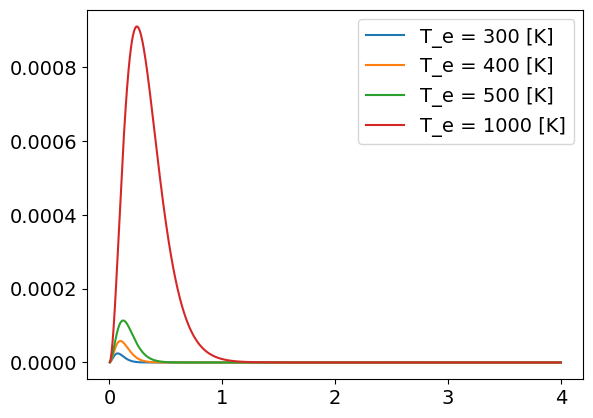

In [4]:
E_em_vals = np.linspace(0, 4, 1000)
for T_e in [300, 400, 500, 1000]:
    plt.plot(E_em_vals, ((E_em_vals)**2)*E_BB(E_em_vals), label =  f'T_e = {T_e} [K]')
    plt.legend()

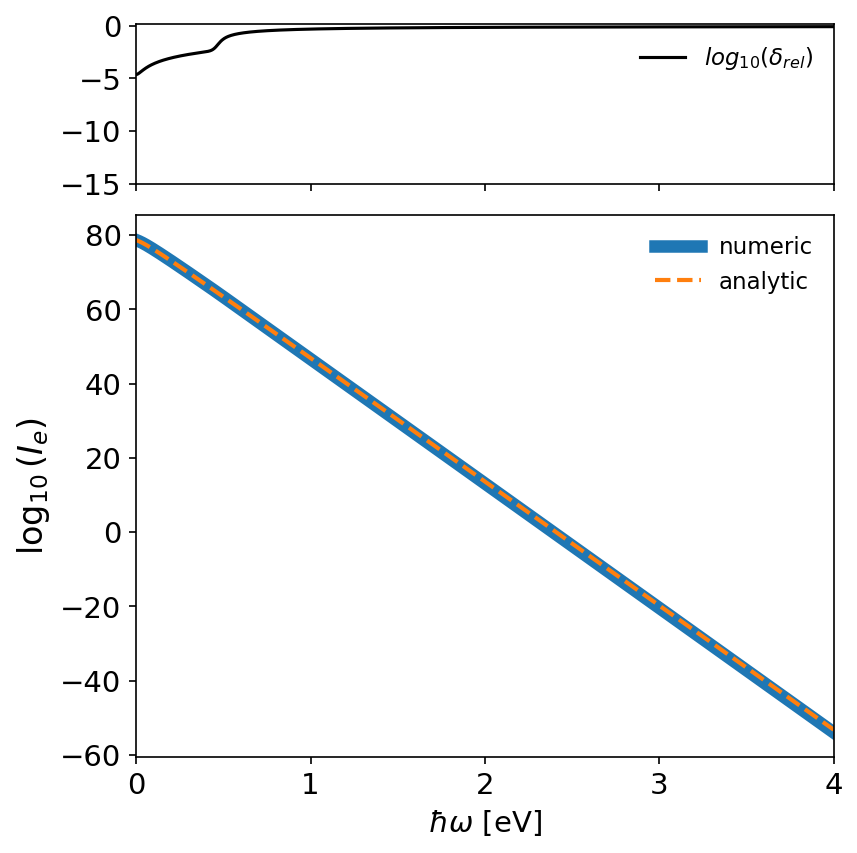

In [5]:
plot_comparison(E_em_vals, I_e_T_numeric_vals, I_e_T_analytic_vals)

/var/folders/4g/4317v5054m73dxntbj111lww0000gn/T/ipykernel_11236/2624983081.py:15: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(E_em_values, np.log10(relative_error_vals), label=r"$log_{10}(\delta_{rel})$",color = 'k')


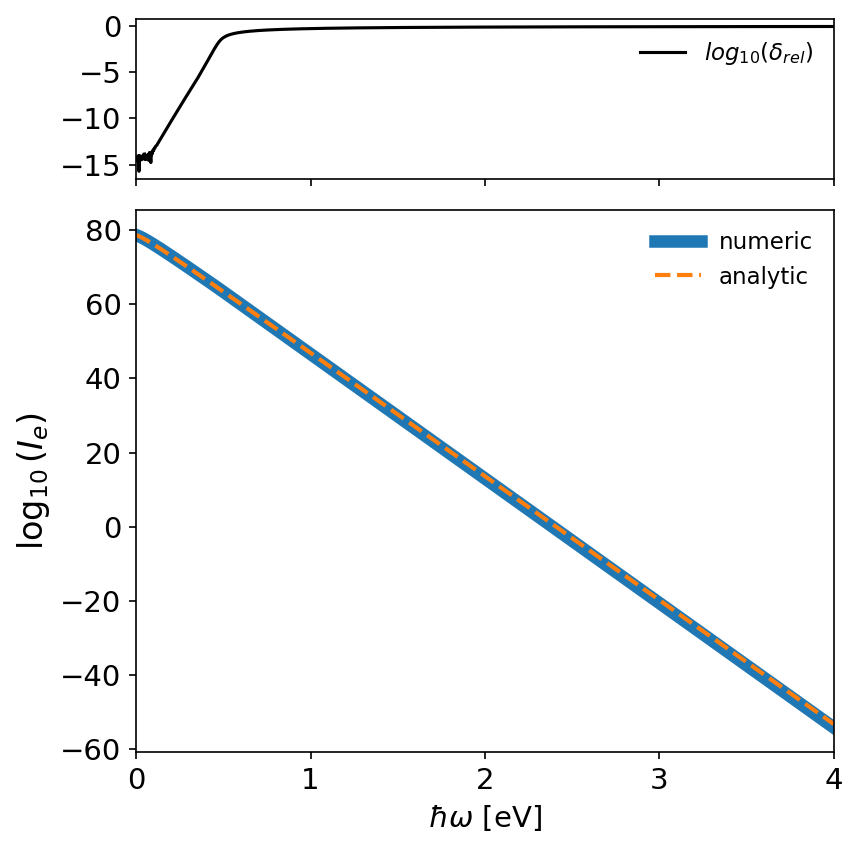

In [6]:
plot_comparison(E_em_vals, I_e_T_numeric_vals_c, I_e_T_analytic_vals)

In [31]:
############# NON-EQUILIBRIUM #############
delta_E = (abs( EF_L / EF_sat)**2)

# nonthermal distribution
def f_NT(E):
    A = f_T(E - E_L)*( 1 - f_T(E) )
    B = f_T(E)*( 1 - f_T(E + E_L) )
    return delta_E*(A-B)

# nonequilibrium distribution
def f(E):
    return f_T(E) + f_NT(E)

# integrand in the I_e integral   
def j(E, E_em, eDOS = 'eDOS'):
    if eDOS == 'eDOS':
        return f(E + E_em) * (1 - f(E)) * g(E + E_em) * g(E)
    elif eDOS == 'const':
        return f(E + E_em) * (1 - f(E)) * g(E_F) * g(E_F)


############# ANALYTIC #############
# non-thermal analytic approximation
def I_e_analytic(E_em, eDOS = 'eDOS'):
    A = 2*E_BB(E_em - E_L)
    B = -2*E_BB(E_em - E_L) + E_BB(E_em - 2*E_L)
    
    if eDOS == 'eDOS':
        return ( E_BB(E_em) + delta_E*A + delta_E*delta_E*B ) * g(E_F) * g(E_F)
    elif eDOS == 'const':
        return ( E_BB(E_em) + delta_E*A + delta_E*delta_E*B )
    

############# NUMERIC #############
# thermal numeric integration

def I_e_numeric(E_em, eDOS = 'eDOS'):
    E = np.arange(E_min, E_max, dE)
    return simpson(j(E, E_em, eDOS), E)

In [32]:
# emission energy values
E_em_vals = np.linspace(0.01, 8.0, 1000)
dE = 0.0005
E_max = 20

I_e_T_numeric_vals = np.array( [I_e_T_numeric(E_em) for E_em in E_em_vals] )
I_e_T_numeric_vals_c = np.array( [I_e_T_numeric(E_em, 'const') for E_em in E_em_vals] )
I_e_T_analytic_vals_c = np.array( I_e_T_analytic(E_em_vals) )

I_e_numeric_vals = np.array( [I_e_numeric(E_em) for E_em in E_em_vals] )
I_e_numeric_vals_c = np.array( [I_e_numeric(E_em, 'const') for E_em in E_em_vals] )
I_e_analytic_vals = I_e_analytic(E_em_vals)
I_e_analytic_vals_c = I_e_analytic(E_em_vals, 'const')

print(type(I_e_analytic_vals))
print(type(I_e_numeric_vals))
print(type(I_e_numeric_vals_c))

/var/folders/4g/4317v5054m73dxntbj111lww0000gn/T/ipykernel_11236/588974918.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (np.exp((E - mu) / (k_B * T_e)) + 1)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


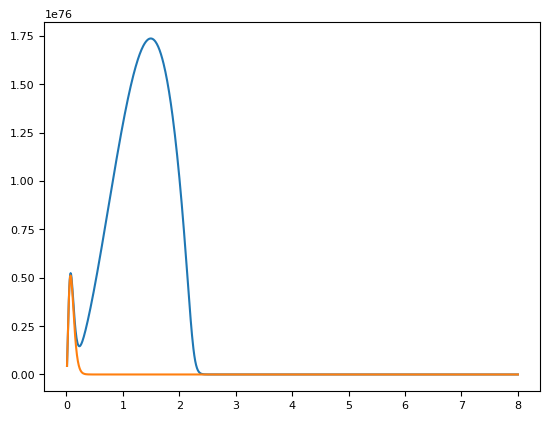

In [38]:
plt.plot(E_em_vals, (E_em_vals**2)*I_e_numeric_vals)
plt.plot(E_em_vals, (E_em_vals**2)*I_e_T_numeric_vals)

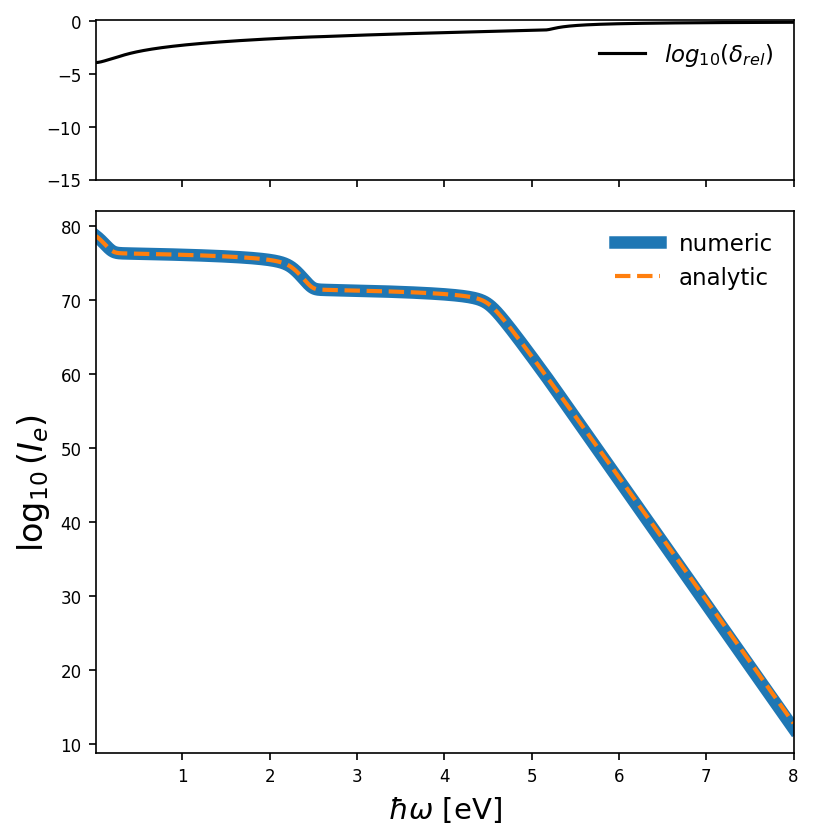

In [33]:
plot_comparison(E_em_vals, I_e_numeric_vals, I_e_analytic_vals)

(0.01, 8.0)

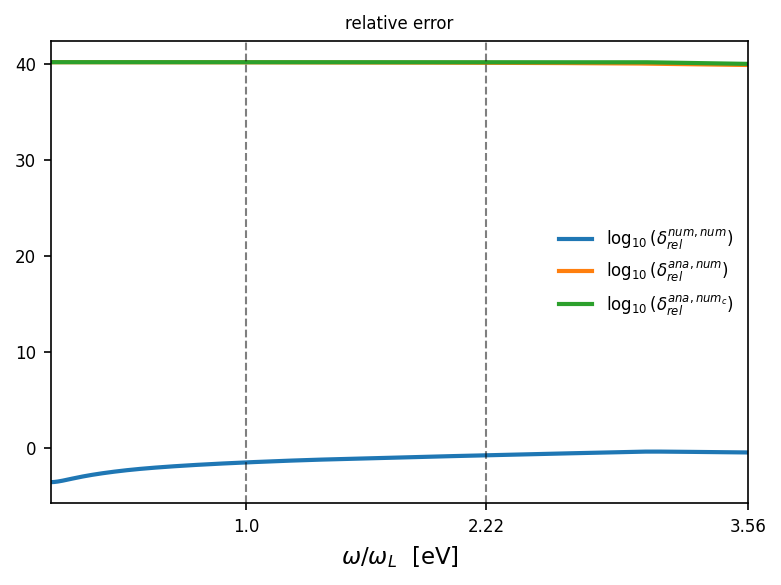

In [10]:
# plot_comparison(E_em_values,I_e_T_numeric_vals, I_e_T_analytic_vals)
# plot_comparison(E_em_values,I_e_numeric_vals, I_e_analytic_vals)
# plot_comparison(E_em_values, I_e_numeric_vals_c, I_e_numeric_vals)
plt.rcParams.update({'font.size': 8})

Ni = 800
fig, ax2 = plt.subplots(figsize = (6,4), dpi=150)

d_num = np.abs( (I_e_numeric_vals - I_e_numeric_vals_c) / I_e_numeric_vals )
d_ana_num_c = np.abs( (I_e_analytic_vals - I_e_numeric_vals_c) / I_e_analytic_vals )
d_ana_num = np.abs( (I_e_analytic_vals - I_e_numeric_vals) / I_e_analytic_vals )
ax2.plot(E_em_vals, np.log10(d_num), label = r'$\log_{10}(\delta_{rel}^{num, num})$', linewidth = 2.0)
ax2.plot(E_em_vals, np.log10(d_ana_num), label = r'$\log_{10}(\delta_{rel}^{ana, num})$', linewidth = 2.0)
ax2.plot(E_em_vals, np.log10(d_ana_num_c), label = r'$\log_{10}(\delta_{rel}^{ana, num_c})$', linewidth = 2.0)
ax2.legend(fontsize = 8, frameon=False)

ax2.set_xlabel(r'$\omega / \omega_{L}$  [eV]', fontsize = 11)
ax2.set_title('relative error', fontsize = 8)
ax2.axvline(E_L, color = 'k', linestyle = 'dashed', alpha = 0.5, linewidth = 1.0)
ax2.axvline(E_F, color = 'k', linestyle = 'dashed', alpha = 0.5, linewidth = 1.0)

x_ticks = np.array([0, E_L, E_F, 8])
ax2.set_xticks(x_ticks, labels = np.round((1/E_L)*(x_ticks),2))
ax2.set_xlim(min(E_em_vals), max(E_em_vals))

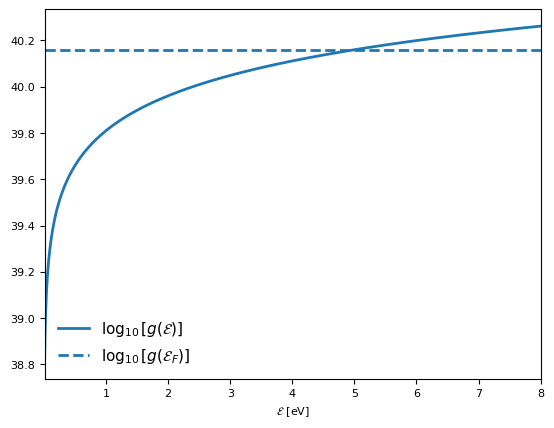

In [11]:
plt.plot(E_em_vals, np.log10(g(E_em_vals)), label = '$\\log_{10}[g(\\mathcal{E})]$', linewidth = 2.0)
# plt.plot(E_em_vals, np.log10(g(E_em_vals)), label = '$\\log_{10}[g(\\mathcal{E})]$')
plt.axhline(np.log10(g(E_F)), label = "$\\log_{10}[g(\\mathcal{E}_F)]$", linewidth = 2.0, linestyle = 'dashed')
plt.xlim(min(E_em_vals),max(E_em_vals))
plt.xlabel('$\\mathcal{E}$ [eV]')
plt.legend(frameon=False,fontsize = 11)

In [12]:
# V = [0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.009, 0.008, 0.007, 0.006, 0.005]
V = np.linspace(0.005,0.1,100)
V = np.flip(V)
for dE in V:
    E_F = 5
    T_e = 300
    E_max = 10
    E_em_values = np.linspace(0.01, 8.0, 1000)

    I_e_numeric_vals = [I_e_numeric(E_em) for E_em in E_em_values]
    I_e_analytic_vals = I_e_analytic(E_em_values)
    
    dI = np.abs( (I_e_numeric_vals - I_e_analytic_vals) / I_e_analytic_vals )
    
    plt.plot(E_em_values, np.log10(dI), label = f"$\Delta E$ = {dE} [eV]")
    plt.title(r"convergence of $\delta I_{rel} $ with shrinking $\Delta E$  ($E_{max} = 10 [eV]$)")
    plt.ylabel(r"$\log_{10}(\delta I_{rel}) $")
    plt.ylim(-3.2,0.05)
    plt.xlim(-0.1, max(E_em_values))
    plt.legend()
    
    x_ticks = np.array([0, E_L, E_F, 8])
    x_tick_labels = np.round( (1/E_L)*np.array([0, E_L, E_F, max(x_ticks)]) , 2)
    plt.xticks(x_ticks, x_tick_labels)
    plt.xlabel(r"$\omega / \omega_L$")

    
    plt.show()
    time.sleep(0.0001)
    clear_output(wait=True)
    

/var/folders/4g/4317v5054m73dxntbj111lww0000gn/T/ipykernel_11236/124092921.py:15: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(E_em_values, np.log10(dI), label = f"$\Delta E$ = {dE} [eV]")


KeyboardInterrupt: 

/var/folders/4g/4317v5054m73dxntbj111lww0000gn/T/ipykernel_21154/3243139295.py:32: RuntimeWarning: overflow encountered in exp
  return 1 / (np.exp((E - mu) / (k_B * T_e)) + 1)


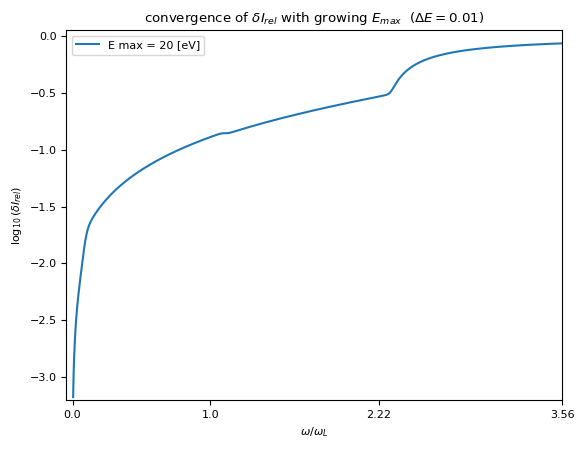

In [25]:
for E_max in [5, 6, 7, 8, 9, 10, 15, 20]:
    E_F = 5
    T_e = 300
    dE = 0.01
    E_em_values = np.linspace(0.01, 8.0, 1000)
    
    I_e_numeric_vals = [I_e_numeric(E_em) for E_em in E_em_values]
    I_e_analytic_vals = I_e_analytic(E_em_values)
    
    dI = np.abs( (I_e_numeric_vals - I_e_analytic_vals) / I_e_analytic_vals )
    
    plt.plot(E_em_values, np.log10(dI), label = f"E max = {E_max} [eV]")
    plt.title(r"convergence of $\delta I_{rel} $ with growing $E_{max}$  ($\Delta E = 0.01$)")
    plt.xticks(x_ticks, x_tick_labels)
    plt.xlabel(r"$\omega / \omega_L$")
    plt.ylabel(r"$\log_{10}(\delta I_{rel}) $")
    plt.ylim(-3.2,0.05)
    plt.xlim(-0.1, max(E_em_values))
    plt.legend()
    
    x_ticks = np.array([0, E_L, E_F, 8])
    x_tick_labels = np.round( (1/E_L)*np.array([0, E_L, E_F, max(x_ticks)]) , 2)

    
    plt.show()
    time.sleep(1.5)
    clear_output(wait=True)

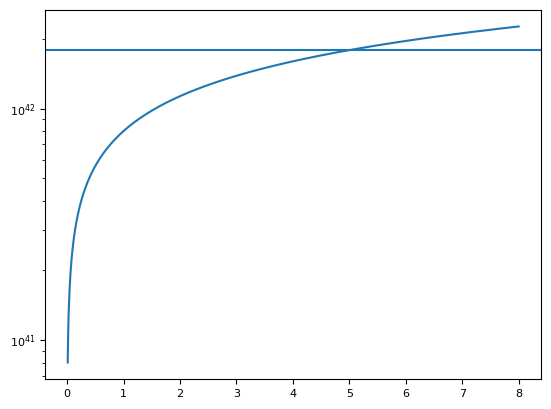

In [26]:
E_F = 5
plt.semilogy(E_em_vals,g(E_em_vals))
plt.axhline(g(E_F))

By now we've established that $\Delta E = 0.01 \ [eV]$ and $E_{max} = 10 \ [eV]$ are enough, and increasing maximal integration value or decreasing the integration interval won't yield results that are notably better.   

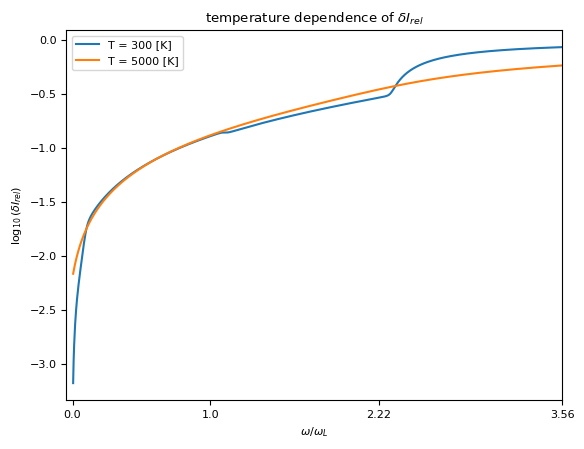

In [27]:
# T = [100, 200, 300, 500, 1000, 2000, 3000, 5000]
T = [300, 5000]
for T_e in T:
    E_F = 5.0
    E_max = 10
    dE = 0.01
    E_em_values = np.linspace(0.01, 8.0, 1000)
    
    I_e_numeric_vals = [I_e_numeric(E_em) for E_em in E_em_values]
    I_e_analytic_vals = I_e_analytic(E_em_values)
    
    dI = np.abs( (I_e_numeric_vals - I_e_analytic_vals) / I_e_analytic_vals )
    
    plt.plot(E_em_values, np.log10(dI), label = f"T = {T_e} [K]")
    plt.title(r"temperature dependence of $\delta I_{rel} $")
    plt.xticks(x_ticks, x_tick_labels)
    plt.xlabel(r"$\omega / \omega_L$")
    plt.ylabel(r"$\log_{10}(\delta I_{rel}) $")
    # plt.ylim(-3.2,0.05)
    
    plt.xlim(-0.1, max(E_em_values))
    plt.legend()
    
    x_ticks = np.array([0, E_L, E_F, 8])
    x_tick_labels = np.round( (1/E_L)*np.array([0, E_L, E_F, max(x_ticks)]) , 2)

    
    # plt.show()
    # time.sleep(2)
    # clear_output(wait=True)

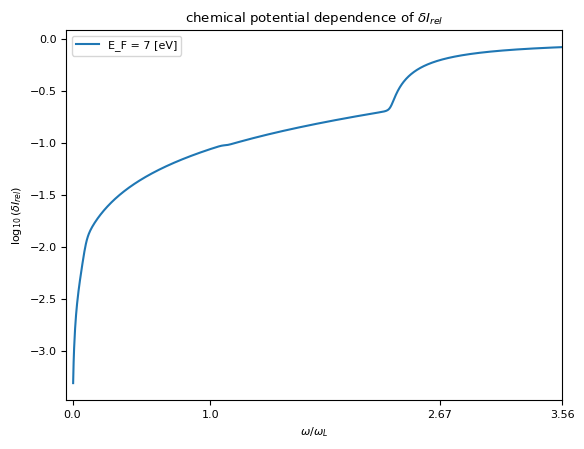

In [28]:
for E_F in [1, 2, 3, 4, 5, 6, 7]:
    T_e = 300
    E_max = 10
    dE = 0.01
    E_em_values = np.linspace(0.01, 8.0, 1000)
    
    I_e_numeric_vals = [I_e_numeric(E_em) for E_em in E_em_values]
    I_e_analytic_vals = I_e_analytic(E_em_values)
    
    dI = np.abs( (I_e_numeric_vals - I_e_analytic_vals) / I_e_analytic_vals )
    
    plt.plot(E_em_values, np.log10(dI), label = f"E_F = {E_F} [eV]")
    plt.title(r"chemical potential dependence of $\delta I_{rel} $")
    plt.xticks(x_ticks, x_tick_labels)
    plt.xlabel(r"$\omega / \omega_L$")
    plt.ylabel(r"$\log_{10}(\delta I_{rel}) $")
    # plt.ylim(-3.2,0.05)
    
    plt.xlim(-0.1, max(E_em_values))
    plt.legend()
    
    x_ticks = np.array([0, E_L, E_F, 8])
    x_tick_labels = np.round( (1/E_L)*np.array([0, E_L, E_F, max(x_ticks)]) , 2)

    
    plt.show()
    time.sleep(2)
    clear_output(wait=True)

In [13]:
Y1 = []
X = np.logspace(-4,-1, num = 100)
for dE in X:
    E_em_values = np.linspace(0.01, 8.0, 1000)

    I_e_T_numeric_vals = [I_e_T_numeric(E_em) for E_em in E_em_values]
    dI_T = np.abs( (I_e_T_numeric_vals - I_e_T_analytic_vals) / I_e_T_analytic_vals )
    Y1.append(dI_T.mean())
    
Y2 = []
for dE in X:
    E_em_values = np.linspace(0.01, 8.0, 1000)

    I_e_T_numeric_vals = [I_e_numeric(E_em) for E_em in E_em_values]
    dI = np.abs( (I_e_T_numeric_vals - I_e_T_analytic_vals) / I_e_T_analytic_vals )
    Y2.append(dI.mean())

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,4), dpi = 150)

ax1.plot(np.log10(X),Y1)
ax2.plot(np.log10(X),Y2)

ax1.set_xlabel(r"$\log_{10} (\Delta \mathcal{E})$")
ax2.set_xlabel(r"$\log_{10} (\Delta \mathcal{E})$")

KeyboardInterrupt: 

In [53]:
X = np.arange(-100,100,1)
Y = np.arange(-50,50,1)

class Molecule:
    """creates a particle at a certain dicrete position in 2D space"""

    def __init__(self, position: list):
        """Initialize the class with attributes."""
        self.position = position
        self.x = self.position[0]
        self.y = self.position[1]


    def time_step(self):

        choice = np.random.choice(['left', 'right', 'up', 'down'])

        if choice == 'left':

            if self.position[0] == max(X):
                pass
            else:
                self.position[0] = self.position[0] - 1
        
        elif choice == 'right':
            if self.position[0] == min(X):
                pass    
            else:
                self.position[0] = self.position[0] + 1
                
        elif choice == 'up':
            if self.position[1] == max(Y):
                pass
            else:
                self.position[1] = self.position[1] - 1
        
        elif choice == 'down':
            if self.position[1] == min(Y):
                pass    
            else:
                self.position[1] = self.position[1] + 1

In [54]:
import time
from IPython.display import clear_output
molecule1 = Molecule([0,0])

for i in range(1000):
    fig, ax = plt.subplots(figsize = (10,5))
    ax.set_xlim(min(X), max(X))
    ax.set_ylim(min(Y), max(Y))
    
    
    molecule1.time_step()
    ax.scatter(molecule1.position[0], molecule1.position[1], color = 'k')
    plt.show()
    time.sleep(0.05)
    clear_output(wait=True)

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

KeyboardInterrupt: 

(0.0, 1000.0)

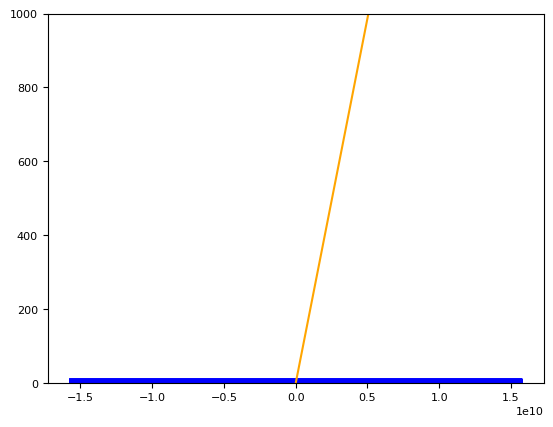

In [17]:
def E_e(k):
    return ((hbar*k)**2)/(2*m_e)

def E_ph(k):
    return hbar*k*c

a = 1e-10 # [m]
k_BZ = np.pi/(2*a)

k = np.linspace(-k_BZ,k_BZ,10000)

N = 1e4
for n in np.linspace(-N,N,100):
    plt.plot(k, E_e(k-n*k_BZ), color = 'blue')
plt.plot(k, E_ph(k), color = 'orange')
plt.ylim(0,1000)